In [36]:
#นำเข้าข้อมูลและแปลงข้อมูล
import csv 
from matplotlib import pyplot as plt
from array_solution import Matrix ,Array
with open('ionosphere_data.csv') as Data_file:
    Data_list = csv.reader(Data_file)
    Data = [Data for Data in Data_list]
    Rawdata_array = Array(1).array1D(Data) #change list to array
Rawdata_array

[ ['1', '0', '0.99539', '-0.05889', '0.85243', '0.02306', '0.83398', '-0.37708', '1', '0.03760', '0.85243', '-0.17755', '0.59755', '-0.44945', '0.60536', '-0.38223', '0.84356', '-0.38542', '0.58212', '-0.32192', '0.56971', '-0.29674', '0.36946', '-0.47357', '0.56811', '-0.51171', '0.41078', '-0.46168', '0.21266', '-0.34090', '0.42267', '-0.54487', '0.18641', '-0.45300', 'g'], ['1', '0', '1', '-0.18829', '0.93035', '-0.36156', '-0.10868', '-0.93597', '1', '-0.04549', '0.50874', '-0.67743', '0.34432', '-0.69707', '-0.51685', '-0.97515', '0.05499', '-0.62237', '0.33109', '-1', '-0.13151', '-0.45300', '-0.18056', '-0.35734', '-0.20332', '-0.26569', '-0.20468', '-0.18401', '-0.19040', '-0.11593', '-0.16626', '-0.06288', '-0.13738', '-0.02447', 'b'], ['1', '0', '1', '-0.03365', '1', '0.00485', '1', '-0.12062', '0.88965', '0.01198', '0.73082', '0.05346', '0.85443', '0.00827', '0.54591', '0.00299', '0.83775', '-0.13644', '0.75535', '-0.08540', '0.70887', '-0.27502', '0.43385', '-0.12062', '0.5

แยก feature และ Target

In [37]:
Input_array = Matrix(len(Rawdata_array),len(Rawdata_array[0])-1)
Target_list = list()
for i in range(len(Rawdata_array)):
        for j in range(len(Rawdata_array[0])-1):
          Input_array[i,j] = Rawdata_array[i][0:-1][j] #กำหนดindex
        Target_list.append(Rawdata_array[i][-1])  

In [38]:
#แปลงค่าผลเป็น 0 1 
for i in range(len(Target_list)):
    if Target_list[i] == "g":
        Target_list[i] = 1
    if Target_list[i] == "b":
        Target_list[i] = 0


In [39]:
Target_array = Matrix(351,2)
for i in range(len(Target_list)):
    if Target_list[i] == 0:
        Target_array[i,0] = 0 
        Target_array[i,1] = 1
    if Target_list[i] == 1:
        Target_array[i,0] = 1 
        Target_array[i,1] = 0

### 3

In [40]:
#แบ่ง fold
Input_Train = Matrix(234, 34)
Input_Test = Matrix(117, 34)
Target_Train = Matrix(234, 2)
Target_Test = Matrix(117, 2)

NumTest = 0
NumTrain = 0
for i in range(351):
    if (i%3) == 2:
        for j in range(34):
            Input_Test[NumTest,j] = Input_array[i,j]
        for k in range(2) :
            Target_Test[NumTest,k] = Target_array[i,k]
        NumTest += 1
    else:
        for j in range(34):
            Input_Train[NumTrain,j] = Input_array[i,j]
        for k in range(2):
            Target_Train[NumTrain,k] = Target_array[i,k]
        NumTrain += 1

print('Number of Train data: ',NumTrain)
print('Number of Test data: ',NumTest)

Input = Matrix.transpose(Input_Train)
Target = Matrix.transpose(Target_Train)



Number of Train data:  234
Number of Test data:  117


In [41]:
# converting the input in matrix form
Input = Input_Train.transpose()
print("Input in matrix form:\n", Input)

# shape of input matrix
print("\nShape of Input Matrix:", Input.shape())

Input in matrix form:
 [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [42]:
#Hyperparameter 
NumHidden = 6 #ac depend on thissss
NumInput = 34
NumOutput = 2
print("No.Input Unit:",2)
print("No.Hidden layer:",1)
print("No.Hidden Unit:",NumHidden)
print("No.Output Unit:",2)

No.Input Unit: 2
No.Hidden layer: 1
No.Hidden Unit: 6
No.Output Unit: 2


In [43]:
####ก่อนเทรนนน
import random
weights_input_hidden = Matrix(1,1).random_weight(NumInput, NumHidden)
weights_hidden_output = Matrix(1,1).random_weight(NumHidden, NumOutput)
weights_input_hidden.shape(), weights_hidden_output.shape()
alpha = 0.01 #ac depend on thiss
epochs = 100 #and Thissss
print(weights_hidden_output)
print(weights_input_hidden)

[0.3919812702624845, 0.19160448853604717 
 0.4372803742153707, 0.6784521750235597 
 0.10437481420810757, 0.01966611015254416 
 0.9088731246884105, 0.6113000679965287 
 0.6369740058670771, 0.0633884783380293 
 0.2457347320772536, 0.4913014032363697 ]
[0.2105449026950872, 0.6464105746803135, 0.12541717972848454, 0.7715383583289968, 0.12809745989413113, 0.9344795506682124 
 0.30990103665215885, 0.5192580924158965, 0.6682155745312595, 0.5658682894227391, 0.15691194546336507, 0.455504636483519 
 0.6624847613408754, 0.04450133365733111, 0.7477057783943585, 0.844489156200369, 0.13311401930706224, 0.05128762749075222 
 0.06635293606751014, 0.4161173185919652, 0.3568329827437078, 0.4686608207083487, 0.5557358086910185, 0.16583895921052316 
 0.23426814058741996, 0.4565030322500152, 0.831789563369889, 0.17092565432393025, 0.5468838343994603, 0.5858928037770806 
 0.9311614826788432, 0.8347349719775857, 0.9060375332020463, 0.20428616611069006, 0.7232056435695994, 0.931136343684175 
 0.7420612777600

In [44]:
##เทรนนน
Project = []

for epochs in range(epochs):
    Train_seq = Matrix(1,1).random_permutation(NumTrain)
    for i in range(NumTrain):

        ###### at hidden layer
        # calculate hidden units and activated hidden units
        Hidden = Matrix(1,1).dot(weights_input_hidden.transpose(),Input.slice(0,Train_seq[0,0]).reshape(NumInput,1))
        Hidden = (Hidden).sigmoid()
        
        # calculating the output
        Output = Matrix(1,1).dot(weights_hidden_output.transpose(),Hidden)
        Output = (Output).sigmoid()
        ## Backward Propagation ##


        # calculating error
        Error = (Target.slice(0,Train_seq[0,0]).reshape(NumOutput,1)- Output).square().divide(2)
       
         # calculating rate of change of error w.r.t weight between hidden and output layer
        Error_wrt_output = (Target.slice(0,Train_seq[0,0]).reshape(NumOutput,1) - Output).scaleBy(-1)
        #Error_wrt_output = 
        #Rate
        Output_wrt_outputLayer_LinearTransform = Matrix(1,1).multiply(Output,Matrix(2,1).clear(1)-Output)

        OutputLayer_LinearTransform_wrt_weights_hidden_output = Hidden
        
        Error_wrt_weights_hidden_output = Matrix(1,1).dot(OutputLayer_LinearTransform_wrt_weights_hidden_output,
                                                   (Matrix(1,1).multiply(Error_wrt_output,Output_wrt_outputLayer_LinearTransform)).transpose())
        
        # calculating rate of change of error w.r.t weights between input and hidden layer
        OutputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
        HiddenLayer_activations_wrt_hiddenLayer_linearTransform = Matrix(1,1).multiply(Hidden, (Matrix(6,1).clear(1) - Hidden))
        HiddenLayer_linearTransform_wrt_weights_input_hidden = Input.slice(0,Train_seq[0,0]).reshape(NumInput,1)


        Error_wrt_weights_input_hidden = Matrix(1,1).dot(HiddenLayer_linearTransform_wrt_weights_input_hidden,
                                                      (Matrix(1,1).multiply(HiddenLayer_activations_wrt_hiddenLayer_linearTransform,
                                                                    Matrix(1,1).dot(OutputLayer_LinearTransform_wrt_hiddenLayer_activations,
                                                                             Matrix(1,1).multiply(Output_wrt_outputLayer_LinearTransform,
                                                                                           Error_wrt_output)))).transpose())

        # updating the weights
        weights_hidden_output = weights_hidden_output - Error_wrt_weights_hidden_output.scaleBy(alpha)
        weights_input_hidden = weights_input_hidden - Error_wrt_weights_input_hidden.scaleBy(alpha)
    print(weights_hidden_output)
    print(weights_input_hidden)

    # print error at every 100th epoch
    epoch_Project = Error.average(0)
    print("epochs:",epochs)
    print("Errors:",float(epoch_Project[0,0]))

    # appending the error of each epoch
    Project.append(epoch_Project)


   

[0.3919812702626274, 0.19062008457941346 
 0.4372803742155136, 0.6774677711724751 
 0.10437481420825045, 0.01868170620410397 
 0.9088731246885664, 0.6103189631982678 
 0.636974005867233, 0.06240432015944057 
 0.2457347320773965, 0.4903170915965714 ]
[0.2105449026950872, 0.6464105746087443, 0.12541717972832866, 0.7715363499184411, 0.12809744443891866, 0.9344795053623044 
 0.30990103665215885, 0.5192580924158965, 0.6682155745312595, 0.5658682894227391, 0.15691194546336507, 0.455504636483519 
 0.6624847613408754, 0.0445013335857617, 0.7477057783942026, 0.8444871477898134, 0.13311400385184977, 0.051287582184843306 
 0.06635293606751014, 0.4161173185561806, 0.35683298274362985, 0.46865981650307087, 0.5557358009634124, 0.16583893655756857 
 0.23426814058741996, 0.4565030321784457, 0.8317895633697331, 0.17092364591337492, 0.5468838189442481, 0.5858927584711726 
 0.9311614826788432, 0.8347349719596934, 0.9060375332019943, 0.20428566400805115, 0.7232056397057958, 0.9311363323576977 
 0.74206127

In [45]:
Projects = []
for i in range(100):
    Projects.append(Project[i][0,0])
arange = []
for ranges in range(1,101):
    arange.append(ranges)

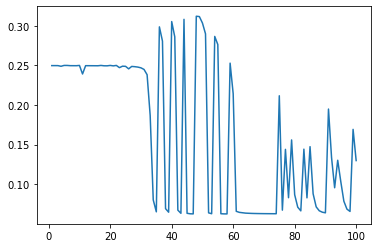

In [46]:
# visualizing the error after each epoch
import matplotlib.pyplot as plt
plt.plot(arange, Projects)

In [47]:
Input = Input_Test.transpose()
Target = Target_Test.transpose()
    
#########################
## Forward Propogation ##
#########################
# calculating hidden layer activations
'''Hidden = np.dot(weights_input_hidden.transpose(),Input)
Hidden = sigmoid(Hidden)'''

Hidden = Matrix(1,1).dot(weights_input_hidden.transpose(),Input)
Hidden = Hidden.sigmoid()

# calculating the output
'''Output = np.dot(weights_hidden_output.T, Hidden)
Output = sigmoid(Output)'''

Output = Matrix(1,1).dot(weights_hidden_output.transpose(),Hidden)
Output = Output.sigmoid()


#check ผล
Class_Output = Output.argmax(axis=0) # ได้ array ขนาด (1,70)
Class_Target = Target.argmax(axis=0) # ได้ array ขนาด (1,70)
correct = 0
miss = 0
#confusion matrix (row=Actual, col=Predicted)
conf_matrix = Matrix(NumOutput,NumOutput)
for i in range(NumTest):
    if Class_Output[0,i] == Class_Target[0,i]:
        correct += 1
    else:
        miss += 1
    conf_matrix[Class_Target[0,i],Class_Output[0,i]] =+1
print('Confusion Matrix (row=Actual, col=Predicted)')
print(conf_matrix)
print('accuracy = {0:.2f}%'.format((correct/NumTest)*100))

Confusion Matrix (row=Actual, col=Predicted)
[1, None 
 1, None ]
accuracy = 64.10%


Train 2

In [48]:
#แบ่ง fold
Input_Train = Matrix(234, 34)
Input_Test = Matrix(117, 34)
Target_Train = Matrix(234, 2)
Target_Test = Matrix(117, 2)

NumTest = 0
NumTrain = 0
for i in range(351):
    if (i%3) == 1:
        for j in range(34):
            Input_Test[NumTest,j] = Input_array[i,j]
        for k in range(2) :
            Target_Test[NumTest,k] = Target_array[i,k]
        NumTest += 1
    else:
        for j in range(34):
            Input_Train[NumTrain,j] = Input_array[i,j]
        for k in range(2):
            Target_Train[NumTrain,k] = Target_array[i,k]
        NumTrain += 1

print('Number of Train data: ',NumTrain)
print('Number of Test data: ',NumTest)

Input = Matrix.transpose(Input_Train)
Target = Matrix.transpose(Target_Train)

Number of Train data:  234
Number of Test data:  117


In [49]:
# converting the input in matrix form
Input = Input_Train.transpose()
print("Input in matrix form:\n", Input)

# shape of input matrix
print("\nShape of Input Matrix:", Input.shape())

Input in matrix form:
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [50]:
#Hyperparameter 
NumHidden = 6 #ac depend on thissss
NumInput = 34
NumOutput = 2
print("No.Input Unit:",2)
print("No.Hidden layer:",1)
print("No.Hidden Unit:",NumHidden)
print("No.Output Unit:",2)

No.Input Unit: 2
No.Hidden layer: 1
No.Hidden Unit: 6
No.Output Unit: 2


In [51]:
####ก่อนเทรนนน
import random
weights_input_hidden = Matrix(1,1).random_weight(NumInput, NumHidden)
weights_hidden_output = Matrix(1,1).random_weight(NumHidden, NumOutput)
weights_input_hidden.shape(), weights_hidden_output.shape()
alpha = 0.01 #ac depend on thiss
epochs = 100 #and Thissss
print(weights_hidden_output)
print(weights_input_hidden)

[0.09068539530373176, 0.08664496201088101 
 0.836018725559676, 0.387992772560093 
 0.5133558501681001, 0.9766301948853312 
 0.3112988631388707, 0.1200441642574488 
 0.27536263351218304, 0.0015831153179473034 
 0.4756681037624023, 0.9334615079427785 ]
[0.6574234142920486, 0.08354872121406576, 0.291522790090154, 0.7461925108866607, 0.332831482642697, 0.7187586709006056 
 0.7882875919602385, 0.09258791372885677, 0.7523033775525222, 0.053639430496253415, 0.0046237261006373265, 0.8634038912168237 
 0.28554939144541924, 0.04421991944666592, 0.33405997242299035, 0.5695294058759294, 0.0683556188951967, 0.6631732377475895 
 0.4854842521311479, 0.6041957944506355, 0.34785466540293564, 0.8173598585967732, 0.12797239474541744, 0.2243575942915318 
 0.4363480951292277, 0.9085956247623344, 0.035766042701775635, 0.7027535592075057, 0.22284613562285638, 0.6214988008374895 
 0.7646595758610548, 0.4515348883471886, 0.7493875524800664, 0.6875042285152768, 0.9788531846077526, 0.611452922685428 
 0.87906459

In [52]:
##เทรนนน
Project = []

for epochs in range(epochs):
    Train_seq = Matrix(1,1).random_permutation(NumTrain)
    for i in range(NumTrain):

        ###### at hidden layer
        # calculate hidden units and activated hidden units
        Hidden = Matrix(1,1).dot(weights_input_hidden.transpose(),Input.slice(0,Train_seq[0,0]).reshape(NumInput,1))
        Hidden = (Hidden).sigmoid()
        
        # calculating the output
        Output = Matrix(1,1).dot(weights_hidden_output.transpose(),Hidden)
        Output = (Output).sigmoid()
        ## Backward Propagation ##


        # calculating error
        Error = (Target.slice(0,Train_seq[0,0]).reshape(NumOutput,1)- Output).square().divide(2)
       
         # calculating rate of change of error w.r.t weight between hidden and output layer
        Error_wrt_output = (Target.slice(0,Train_seq[0,0]).reshape(NumOutput,1) - Output).scaleBy(-1)
        #Error_wrt_output = 
        #Rate
        Output_wrt_outputLayer_LinearTransform = Matrix(1,1).multiply(Output,Matrix(2,1).clear(1)-Output)

        OutputLayer_LinearTransform_wrt_weights_hidden_output = Hidden
        
        Error_wrt_weights_hidden_output = Matrix(1,1).dot(OutputLayer_LinearTransform_wrt_weights_hidden_output,
                                                   (Matrix(1,1).multiply(Error_wrt_output,Output_wrt_outputLayer_LinearTransform)).transpose())
        
        # calculating rate of change of error w.r.t weights between input and hidden layer
        OutputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
        HiddenLayer_activations_wrt_hiddenLayer_linearTransform = Matrix(1,1).multiply(Hidden, (Matrix(6,1).clear(1) - Hidden))
        HiddenLayer_linearTransform_wrt_weights_input_hidden = Input.slice(0,Train_seq[0,0]).reshape(NumInput,1)


        Error_wrt_weights_input_hidden = Matrix(1,1).dot(HiddenLayer_linearTransform_wrt_weights_input_hidden,
                                                      (Matrix(1,1).multiply(HiddenLayer_activations_wrt_hiddenLayer_linearTransform,
                                                                    Matrix(1,1).dot(OutputLayer_LinearTransform_wrt_hiddenLayer_activations,
                                                                             Matrix(1,1).multiply(Output_wrt_outputLayer_LinearTransform,
                                                                                           Error_wrt_output)))).transpose())

        # updating the weights
        weights_hidden_output = weights_hidden_output - Error_wrt_weights_hidden_output.scaleBy(alpha)
        weights_input_hidden = weights_input_hidden - Error_wrt_weights_input_hidden.scaleBy(alpha)
    print(weights_hidden_output)
    print(weights_input_hidden)

    # print error at every 100th epoch
    epoch_Project = Error.average(0)
    print("epochs:",epochs)
    print("Errors:",float(epoch_Project[0,0]))

    # appending the error of each epoch
    Project.append(epoch_Project)


   

[0.0886079195487449, 0.08664561863241892 
 0.8346213020999576, 0.3879932142414815 
 0.5117613354119147, 0.9766306988606626 
 0.30932613397971387, 0.12004478777282473 
 0.273103681221834, 0.0015838292981165648 
 0.47333734060062366, 0.9334622446198945 ]
[0.6574030434154178, 0.08308077324910845, 0.2912643163479986, 0.7460980570491609, 0.33281189966401553, 0.7187577568877803 
 0.7882875919602385, 0.09258791372885677, 0.7523033775525222, 0.053639430496253415, 0.0046237261006373265, 0.8634038912168237 
 0.2855301210035448, 0.04377725003077563, 0.33381546143238583, 0.5694400544347322, 0.0683370937890238, 0.6631723731097375 
 0.4854847990891858, 0.6042083588534942, 0.347861605422912, 0.81736239468231, 0.12797292054839507, 0.22435761883277597 
 0.4363684660058573, 0.9090635727272911, 0.036024516443931315, 0.7028480130450055, 0.22286571860153745, 0.6214997148503149 
 0.7646542527472827, 0.45141260886446555, 0.7493200107065042, 0.6874795467830006, 0.9788480673795934, 0.6114526838447368 
 0.87907

In [53]:
Projects = []
for i in range(100):
    Projects.append(Project[i][0,0])
arange = []
for ranges in range(1,101):
    arange.append(ranges)

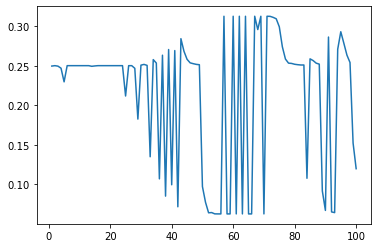

In [54]:
# visualizing the error after each epoch
import matplotlib.pyplot as plt
plt.plot(arange, Projects)

In [55]:
Input = Input_Test.transpose()
Target = Target_Test.transpose()
    
#########################
## Forward Propogation ##
#########################
# calculating hidden layer activations
'''Hidden = np.dot(weights_input_hidden.transpose(),Input)
Hidden = sigmoid(Hidden)'''

Hidden = Matrix(1,1).dot(weights_input_hidden.transpose(),Input)
Hidden = Hidden.sigmoid()

# calculating the output
'''Output = np.dot(weights_hidden_output.T, Hidden)
Output = sigmoid(Output)'''

Output = Matrix(1,1).dot(weights_hidden_output.transpose(),Hidden)
Output = Output.sigmoid()


#check ผล
Class_Output = Output.argmax(axis=0) # ได้ array ขนาด (1,70)
Class_Target = Target.argmax(axis=0) # ได้ array ขนาด (1,70)
correct = 0
miss = 0
#confusion matrix (row=Actual, col=Predicted)
conf_matrix = Matrix(NumOutput,NumOutput)
for i in range(NumTest):
    if Class_Output[0,i] == Class_Target[0,i]:
        correct += 1
    else:
        miss += 1
    conf_matrix[Class_Target[0,i],Class_Output[0,i]] =+1
print('Confusion Matrix (row=Actual, col=Predicted)')
print(conf_matrix)
print('accuracy = {0:.2f}%'.format((correct/NumTest)*100))

Confusion Matrix (row=Actual, col=Predicted)
[1, None 
 1, None ]
accuracy = 64.10%


Train 3

In [56]:
#แบ่ง fold
Input_Train = Matrix(234, 34)
Input_Test = Matrix(117, 34)
Target_Train = Matrix(234, 2)
Target_Test = Matrix(117, 2)

NumTest = 0
NumTrain = 0
for i in range(351):
    if (i%3) == 0:
        for j in range(34):
            Input_Test[NumTest,j] = Input_array[i,j]
        for k in range(2) :
            Target_Test[NumTest,k] = Target_array[i,k]
        NumTest += 1
    else:
        for j in range(34):
            Input_Train[NumTrain,j] = Input_array[i,j]
        for k in range(2):
            Target_Train[NumTrain,k] = Target_array[i,k]
        NumTrain += 1

print('Number of Train data: ',NumTrain)
print('Number of Test data: ',NumTest)

Input = Matrix.transpose(Input_Train)
Target = Matrix.transpose(Target_Train)



Number of Train data:  234
Number of Test data:  117


In [64]:
# converting the input in matrix form
Input = Input_Train.transpose()
print("Input in matrix form:\n", Input)

# shape of input matrix
print("\nShape of Input Matrix:", Input.shape())

Input in matrix form:
 [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [58]:
#Hyperparameter 
NumHidden = 6 #ac depend on thissss
NumInput = 34
NumOutput = 2
print("No.Input Unit:",2)
print("No.Hidden layer:",1)
print("No.Hidden Unit:",NumHidden)
print("No.Output Unit:",2)

No.Input Unit: 2
No.Hidden layer: 1
No.Hidden Unit: 6
No.Output Unit: 2


In [59]:
####ก่อนเทรนนน
import random
weights_input_hidden = Matrix(1,1).random_weight(NumInput, NumHidden)
weights_hidden_output = Matrix(1,1).random_weight(NumHidden, NumOutput)
weights_input_hidden.shape(), weights_hidden_output.shape()
alpha = 0.01 #ac depend on thiss
epochs = 100 #and Thissss
'''print(weights_hidden_output)
print(weights_input_hidden)'''

'print(weights_hidden_output)\nprint(weights_input_hidden)'

In [60]:
##เทรนนน
Project = []

for epochs in range(epochs):
    Train_seq = Matrix(1,1).random_permutation(NumTrain)
    for i in range(NumTrain):

        ###### at hidden layer
        # calculate hidden units and activated hidden units
        Hidden = Matrix(1,1).dot(weights_input_hidden.transpose(),Input.slice(0,Train_seq[0,0]).reshape(NumInput,1))
        Hidden = (Hidden).sigmoid()
        
        # calculating the output
        Output = Matrix(1,1).dot(weights_hidden_output.transpose(),Hidden)
        Output = (Output).sigmoid()
        ## Backward Propagation ##


        # calculating error
        Error = (Target.slice(0,Train_seq[0,0]).reshape(NumOutput,1)- Output).square().divide(2)
       
         # calculating rate of change of error w.r.t weight between hidden and output layer
        Error_wrt_output = (Target.slice(0,Train_seq[0,0]).reshape(NumOutput,1) - Output).scaleBy(-1)
        #Error_wrt_output = 
        #Rate
        Output_wrt_outputLayer_LinearTransform = Matrix(1,1).multiply(Output,Matrix(2,1).clear(1)-Output)

        OutputLayer_LinearTransform_wrt_weights_hidden_output = Hidden
        
        Error_wrt_weights_hidden_output = Matrix(1,1).dot(OutputLayer_LinearTransform_wrt_weights_hidden_output,
                                                   (Matrix(1,1).multiply(Error_wrt_output,Output_wrt_outputLayer_LinearTransform)).transpose())
        
        # calculating rate of change of error w.r.t weights between input and hidden layer
        OutputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
        HiddenLayer_activations_wrt_hiddenLayer_linearTransform = Matrix(1,1).multiply(Hidden, (Matrix(6,1).clear(1) - Hidden))
        HiddenLayer_linearTransform_wrt_weights_input_hidden = Input.slice(0,Train_seq[0,0]).reshape(NumInput,1)


        Error_wrt_weights_input_hidden = Matrix(1,1).dot(HiddenLayer_linearTransform_wrt_weights_input_hidden,
                                                      (Matrix(1,1).multiply(HiddenLayer_activations_wrt_hiddenLayer_linearTransform,
                                                                    Matrix(1,1).dot(OutputLayer_LinearTransform_wrt_hiddenLayer_activations,
                                                                             Matrix(1,1).multiply(Output_wrt_outputLayer_LinearTransform,
                                                                                           Error_wrt_output)))).transpose())

        # updating the weights
        weights_hidden_output = weights_hidden_output - Error_wrt_weights_hidden_output.scaleBy(alpha)
        weights_input_hidden = weights_input_hidden - Error_wrt_weights_input_hidden.scaleBy(alpha)
    print(weights_hidden_output)
    print(weights_input_hidden)

    # print error at every 100th epoch
    epoch_Project = Error.average(0)
    print("epochs:",epochs)
    print("Errors:",float(epoch_Project[0,0]))

    # appending the error of each epoch
    Project.append(epoch_Project)


   

[0.18439863297039, 0.3803317321849653 
 0.16429743889853904, 0.22661457301972956 
 0.6771118774259326, 0.170561985142244 
 0.16364002432585317, 0.6941091023350171 
 0.10802804614969241, 0.4998769128443735 
 0.4193702391094725, 0.41223782207818904 ]
[0.9498903937852042, 0.398508153880213, 0.8636486459670882, 0.15313841478976398, 0.1258737069438437, 0.4227801650480043 
 0.3842252634023735, 0.6138708130470505, 0.8605613619437117, 0.42582879313302346, 0.363181302645909, 0.1447162773774905 
 0.6345526746796676, 0.3214868469301889, 0.26083386947090437, 0.35099616317821625, 0.35501370805656995, 0.9422370062542331 
 0.4111116601068535, 0.7459324350603923, 0.8548977139621091, 0.8104004521067262, 0.7569070877063994, 0.1493588774182053 
 0.39605644275660157, 0.09069167958759805, 0.8898675132371149, 0.22766714619798645, 0.898251666004285, 0.3520111485084708 
 0.1273900569106402, 0.3062219542659991, 0.1465818638262859, 0.7219591007337887, 0.5429704781347149, 0.6662332085568543 
 0.19913817157050773

In [61]:
Projects = []
for i in range(100):
    Projects.append(Project[i][0,0])
arange = []
for ranges in range(1,101):
    arange.append(ranges)

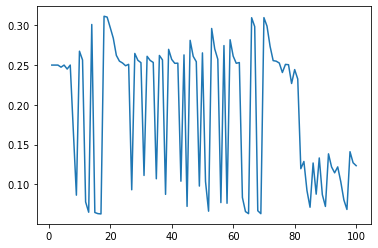

In [62]:
# visualizing the error after each epoch
import matplotlib.pyplot as plt
plt.plot(arange, Projects)

In [63]:
Input = Input_Test.transpose()
Target = Target_Test.transpose()
    
#########################
## Forward Propogation ##
#########################
# calculating hidden layer activations
'''Hidden = np.dot(weights_input_hidden.transpose(),Input)
Hidden = sigmoid(Hidden)'''

Hidden = Matrix(1,1).dot(weights_input_hidden.transpose(),Input)
Hidden = Hidden.sigmoid()

# calculating the output
'''Output = np.dot(weights_hidden_output.T, Hidden)
Output = sigmoid(Output)'''

Output = Matrix(1,1).dot(weights_hidden_output.transpose(),Hidden)
Output = Output.sigmoid()


#check ผล
Class_Output = Output.argmax(axis=0) # ได้ array ขนาด (1,70)
Class_Target = Target.argmax(axis=0) # ได้ array ขนาด (1,70)
correct = 0
miss = 0
#confusion matrix (row=Actual, col=Predicted)
conf_matrix = Matrix(NumOutput,NumOutput)
for i in range(NumTest):
    if Class_Output[0,i] == Class_Target[0,i]:
        correct += 1
    else:
        miss += 1
    conf_matrix[Class_Target[0,i],Class_Output[0,i]] =+1
print('Confusion Matrix (row=Actual, col=Predicted)')
print(conf_matrix)
print('accuracy = {0:.2f}%'.format((correct/NumTest)*100))

Confusion Matrix (row=Actual, col=Predicted)
[1, None 
 1, None ]
accuracy = 64.10%
